<a href="https://colab.research.google.com/github/OliverWard4/ECGRML/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score,
                            confusion_matrix, ConfusionMatrixDisplay,
                            classification_report)


In [25]:
# Configuration
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

In [26]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Load data
file_path = "/content/drive/MyDrive/Algerian_forest_fires_dataset.csv"
df = pd.read_csv(file_path)

In [28]:
# Clean column names
df.columns = df.columns.str.strip()

# Add Region column (1 for first 122 rows, 2 for rest)
df['Region'] = np.where(df.index < 122, 1, 2)

# Handle missing values
df = df.dropna().reset_index(drop=True)

# Clean 'Classes' column
df['Classes'] = df['Classes'].str.strip()
df = df[df['Classes'].isin(['fire', 'not fire'])]

In [29]:
# Convert data types
df1 = df.copy()
df1['Temperature'] = pd.to_numeric(df1['Temperature'], errors='coerce')
df1 = df1.dropna().reset_index(drop=True)

type_conversions = {
    'RH': np.int64, 'Temperature': np.int64,
    'Ws': np.int64, 'Rain': np.float64,
    'FFMC': np.float64, 'DMC': np.float64,
    'DC': np.float64, 'ISI': np.float64,
    'BUI': np.float64, 'FWI': np.float64
}
df1 = df1.astype(type_conversions)

In [30]:
# Save cleaned data
df1.to_csv('forest_fires.csv', index=False)

In [31]:
# Basic info
print("Data Shape:", df1.shape)
print("\nData Types:")
print(df1.dtypes)
print("\nMissing Values:")
print(df1.isnull().sum())
print("\nClass Distribution:")
print(df1['Classes'].value_counts())

Data Shape: (243, 15)

Data Types:
day             object
month           object
year            object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

Missing Values:
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Class Distribution:
Classes
fire        137
not fire    106
Name: count, dtype: int64


In [32]:
# Numeric and categorical columns
numeric_col = [col for col in df1.columns if df1[col].dtype != 'object']
object_col = [col for col in df1.columns if df1[col].dtype == 'object']

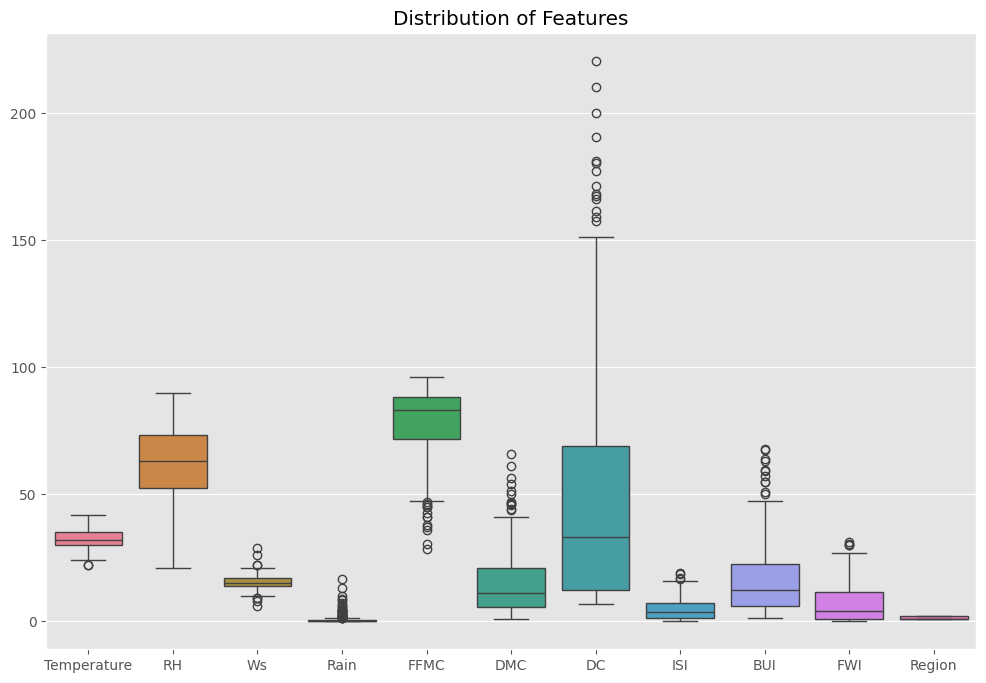

In [33]:
# Boxplot of numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1[numeric_col])
plt.title('Distribution of Features')
plt.show()

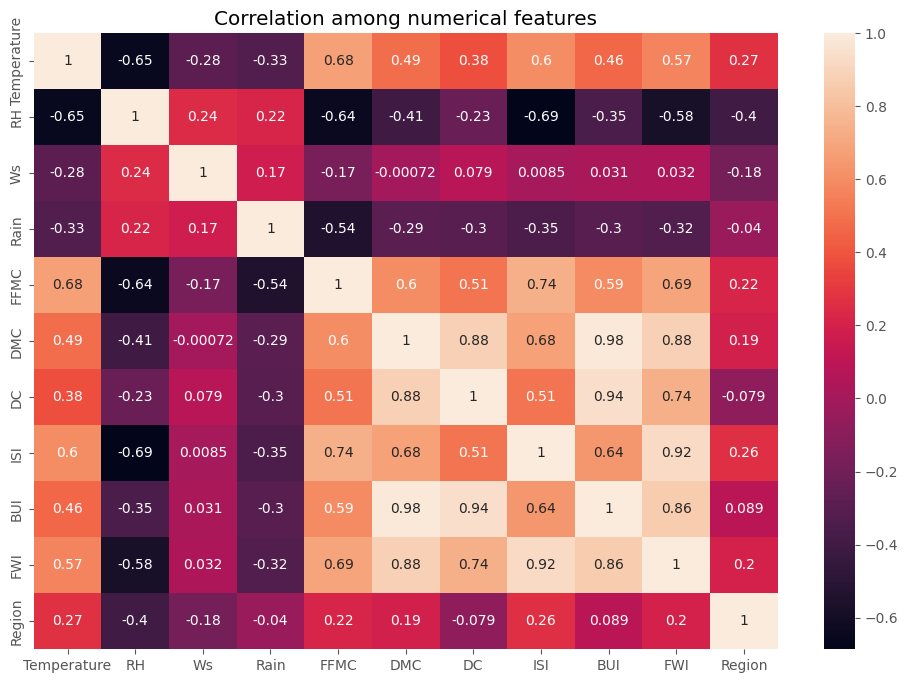

In [34]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_df1 = df1.select_dtypes(include=np.number)
sns.heatmap(numeric_df1.corr(), annot=True)
plt.title('Correlation among numerical features')
plt.show()

In [35]:
# Prepare data for modeling
X = df1.drop(['Classes', 'day', 'month', 'year'], axis=1)
y = df1['Classes']

In [36]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [37]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

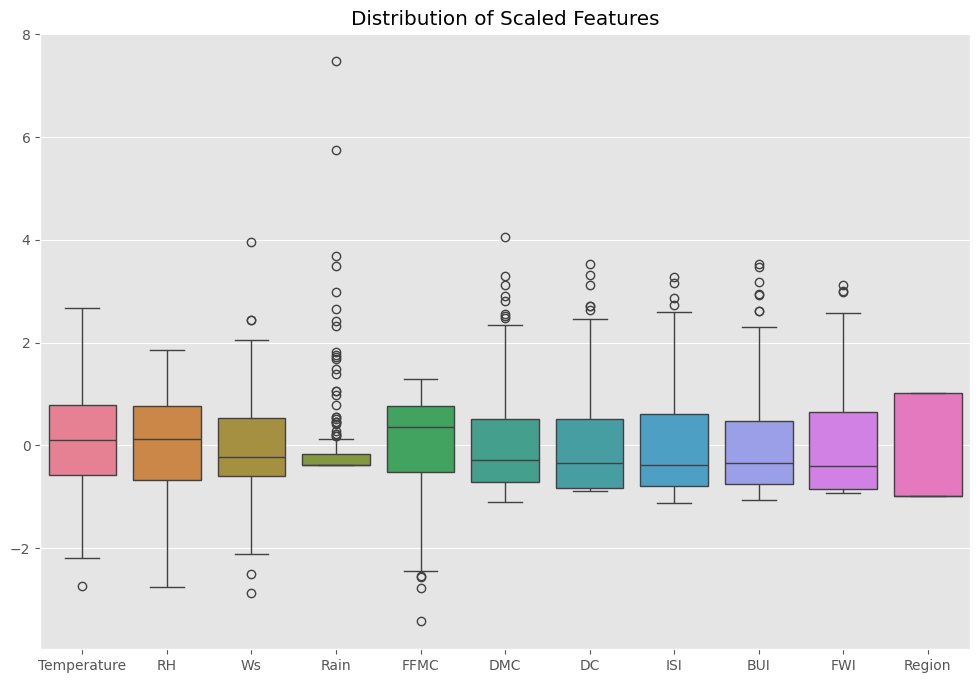

In [43]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=X_train.columns)) # Use scaled data
plt.title('Distribution of Scaled Features')
plt.show()


In [38]:
# Logistic Regression Model
log_reg = LogisticRegression(penalty=None, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


In [39]:
# Evaluation metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='fire'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='fire'):.4f}")

Logistic Regression Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


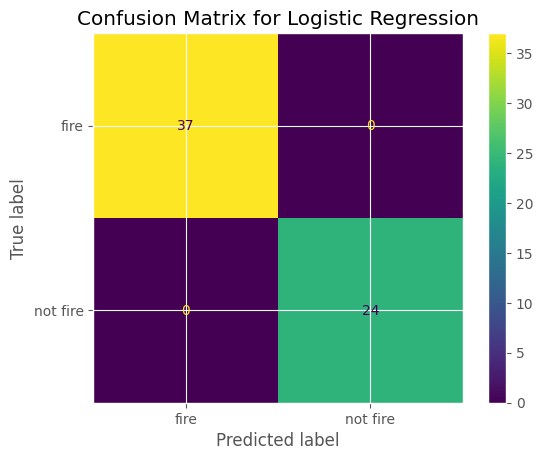


Classification Report:
              precision    recall  f1-score   support

        fire       1.00      1.00      1.00        37
    not fire       1.00      1.00      1.00        24

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))